<center>
    <h1> ILI286 - Computación Científica II</h1>
    <h1> COP- Home</h1>
    <h3> Cesar Contreras Zamorano </h3>
    <h3> cesar.contrerasz@sansano.usm.cl </h3>
    <h3> 2973060-1 </h3>
</center>

In [1]:
import numpy as np
import scipy as sp
import imutils
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
from numpy import linalg as la
import scipy.linalg as spla
from ipywidgets import interact, fixed
import ipywidgets as widgets
import scipy.optimize as optimize

## Pregunta 1

<img src="enun_pregunta1.png">

### 1.a

Para dar solucion al BVP propondremos el metodo del disparo para lo cual tendremos qeu plantear un $u'(s)=s$ y $F(s)=u(\frac{\Pi}{2}) - w(s, \frac{\Pi}{2}))$. Para poder resolver mediante metodo del disparo deberemos seguir los siguientes pasos:

**1°:** Pasar nuestro BVP a un IVP como sistema dinamico, asumiendo un valor s para $u'(s)=s$. Para esto consideremos

\begin{align*}
u_1 &= u  \\
u_2 &= u' \\
\end{align*}

y plantemos nuestro IVP:

\begin{align*}
u_1'(t)&= u_2 \\
u_2'(t)&= -20 cos(20 u_1) \\
u_1'(t)&= -1 \\
u_2'(t)&= s \\
\end{align*}

**2°:** Planteamos 2 valores de S, tal que tengamos 

\begin{align*}
F(s_1)=u(\frac{\Pi}{2}) - w(s_1, \frac{\Pi}{2}) > 0 \\
F(s_2)=u(\frac{\Pi}{2}) - w(s_2, \frac{\Pi}{2}) < 0 \\
\end{align*}

de esta manera tendremos dos valores de s para poder aplicar biseccion y encontrar un S optimo tal que $F(s)=0$


**3°:** Aplicamos Forward Euler para resolver el IVP con $ s_1 $ y $ s_2 $

**4°:** Con esos dos valores de $s_1$ y $s_2$, aplicamos biseccion para encontrar un S optimo al que llamaremos $ s_opt $

**5°:** Aplicamos forward Euler con $ y_2 '(t) = s_{opt} $ y obtendremos nuestra aproximacion de solucion al IVP.

### 1.b

La condicion de borde $u(0)=-1$ es incluida como valor inicial en el IVP generado. 


La condicion de borde $u(0)=\frac{\Pi}{2} = \frac{2}{3}$ se utilizará para poder buscar un cero de la funcion: 

\begin{align*}
F(s)=u(\frac{\Pi}{2}) - w(s, \frac{\Pi}{2}) \\
\end{align*}

Cuando $ u(\frac{\Pi}{2}) $ y $w(s, \frac{\Pi}{2})$ sean iguales, quiere decir que ese valor de s es efectivamente la condicion inicial $u'(0) = s$

### 1.c

In [2]:
# Forward Euler Method para 1 valor de t, por tanto la iteracion se hace fuera del metodo.
def euler_ode(y,t,f,h):
    return y+h*f(t,y)

#usaremos biseccion para poder buscar un cero de nuestra funcion F(s)
def bisect(f, a, b, tol=1e-8):
    verbose = False
    fa = f(a)
    fb = f(b)
    i = 0
    # Just checking if the sign is not negative => not root  necessarily 
    if np.sign(f(a)*f(b)) >= 0:
        print('f(a)f(b)<0 not satisfied!')
        return None
  
    #Printing the evolution of the computation of the root
    if verbose: print(' i |     a     |     c     |     b     |     fa    |     fc     |     fb     |   b-a')
    if verbose: print('----------------------------------------------------------------------------------------')
    
    while(b-a)/2 > tol:
        c = (a+b)/2.
        fc = f(c)
        if verbose: print('%2d | %.7f | %.7f | %.7f | %.7f | %.7f | %.7f | %.7f' %
              (i+1, a, c, b, fa, fc, fb, b-a))
        # Did we find the root?
        if fc == 0:
            if verbose: print('f(c)==0')
            break
        elif np.sign(fa*fc) < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        i += 1
        
    xc = (a+b)/2.
    return xc

#nos permite resolver la edo bajo varios metodos de resolucion
def solve_edo_p1(f, y0, T, N, solver='euler'):
    #generamos los diferentes valores de t
    h=(2*np.pi)/(2*N) - (1*np.pi)/(2*N)
    t_times = np.arange(0, T+h, h)
    #t_times = np.append(t_times, T_r)
    #t_times = np.linspace(0, T+h, N)
    #generamos una arreglo para guardar nuestras soluciones
    y_output = np.zeros([t_times.size,np.size(y0)])
    #guardamos la solucion inicial
    y_output[0,:] = y0
    for i in range(1,t_times.size):
        if solver=='euler':
            y_output[i,:]=euler_ode(y_output[i-1,:],t_times[i-1],f,h)
            #y_output[i]=euler_ode(y_output[i-1],t_times[i-1],f,h)
        elif solver=='RK2':
            y_output[i]=RK2_ode(y_output[i-1],t_times[i-1],f,h)
        else:
            y_output[i]=RK4_ode(y_output[i-1],t_times[i-1],f,h)
    y1 = y_output[:,0]
    y2 = y_output[:,1]
    return t_times, y1, y2

#definimos nuestra funcion vectorial definida en la parte 1.a
def my_fun(t,u):
    u1, u2 = u[0], u[1]
    return np.array([u2, -20*np.cos(20*u1)])

Valor de S encontrado con biseccion: 1.5


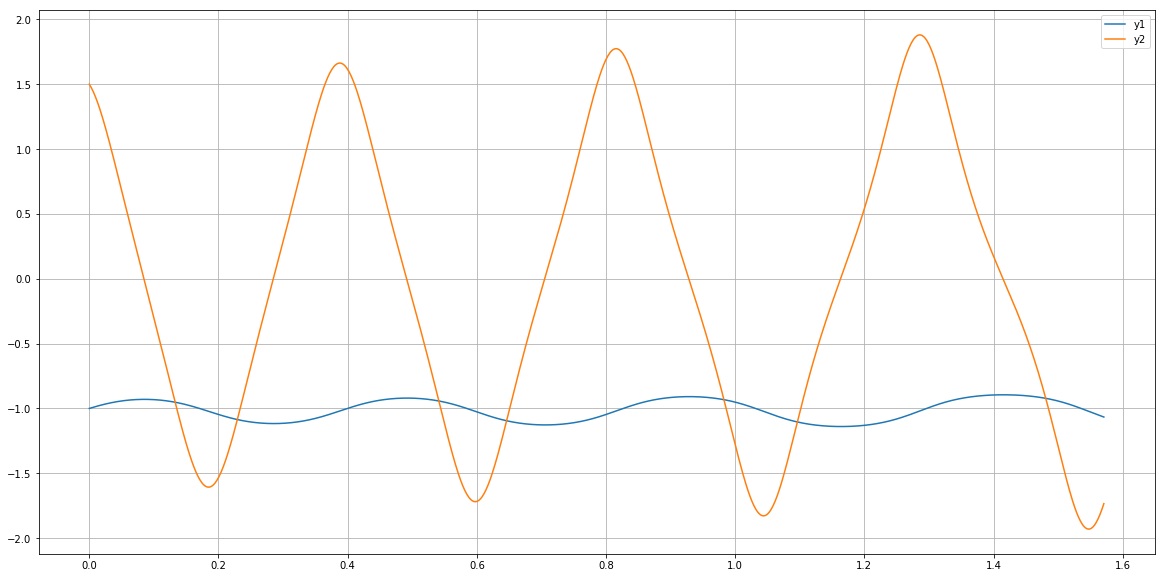

In [3]:
def F(s):
    yn=2/3
    y0=[-1, s]
    N=1000
    T = np.pi / 2
    aux = solve_edo_p1(my_fun, y0, T, N, solver='euler')[1]
    return aux[-1] - yn

#alpha = root(F, 0.)
#print(alpha.x)
#print("......................................")

#valores globales
N=1000
T = np.pi / 2
verbose = False
#calculamos la solucion para un s1
s1 = -2
s2 = 5
#obtenemos S con metodo de la biseccion
s_opt = bisect(F,s2,s1, tol=1e-8)
print("Valor de S encontrado con biseccion: {0}".format(s_opt))
#resolvemos ahora para nuestro valor de s_optimo encontrado con el metodo de la biseccion.
y0 = np.array([-1, s_opt])
#calculamos la solucion para ese s1
t_times, y1_s_opt, y2_s_opt = solve_edo_p1(my_fun, y0, T, N, solver='euler')

#graficamos los resultados
L=20
plt.figure(figsize=(L,L/2))
plt.plot(t_times, y1_s_opt,'-', label='y1')
plt.plot(t_times, y2_s_opt,'-', label='y2')
plt.legend
plt.legend(loc='best')
plt.grid()
plt.show()

Podemos notar que aumentando el numero de puntos de T, podemos lograr mejores resultados con nuestro algoritmo, dado el comportamiento numero que se aprecia. Probando con N=10000 tenemos:

Valor de S encontrado con biseccion: 1.5


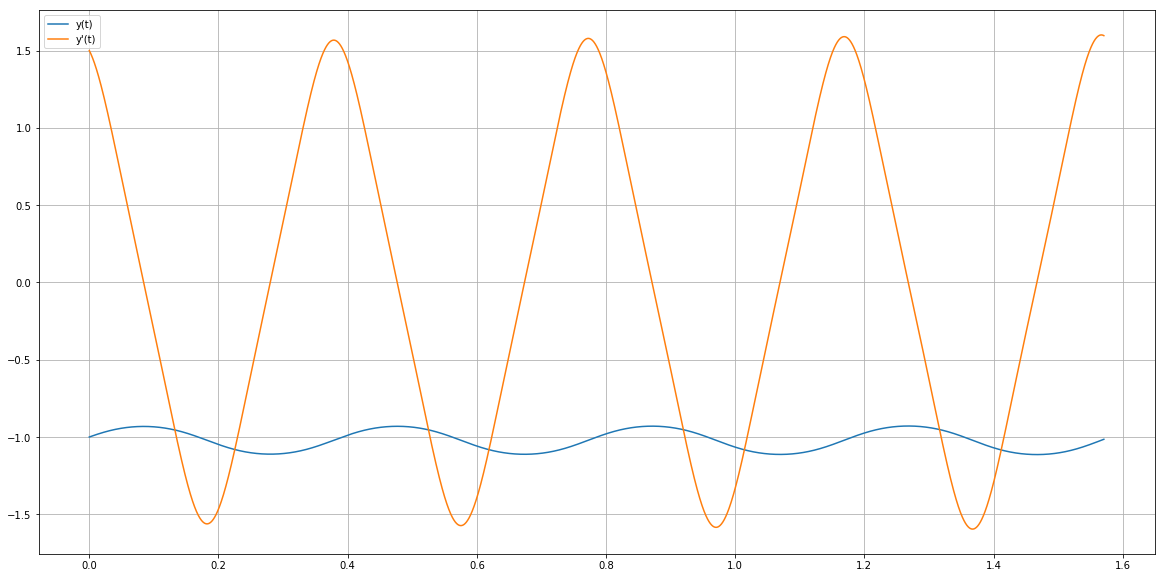

In [4]:
N=10000
s1 = -2
s2 = 5
#obtenemos S con metodo de la biseccion
s_opt = bisect(F, s2, s1, tol=1e-8)
print("Valor de S encontrado con biseccion: {0}".format(s_opt))
#resolvemos ahora para nuestro valor de s_optimo encontrado con el metodo de la biseccion.
y0 = np.array([-1, s_opt])
#calculamos la solucion para ese s1
t_times, y1_s_opt, y2_s_opt = solve_edo_p1(my_fun, y0, T, N, solver='euler')

#graficamos los resultados
L=20
plt.figure(figsize=(L,L/2))
plt.plot(t_times, y1_s_opt,'-', label="y(t)")
plt.plot(t_times, y2_s_opt,'-', label="y'(t)")
plt.legend
plt.legend(loc='best')
plt.grid()
plt.show()

### 1.d

Podemos plantear el problema con punto medio

In [5]:
def myfun(T):
    N=1000
    y0 = np.array([-1, 1.5])
    #calculamos la solucion para ese s1
    t_times, y1, y2 = solve_edo_p1(my_fun, y0, T, N, solver='euler')
    return y1[-1]

#codigo extraido de jupyter notebook
def midpoint(myfun, N, a, b, verbose=False, text='', figname=''):
    f = np.vectorize(myfun) # So we can apply it to arrays without trouble
    x = np.linspace(a, b, N+1) # We want N bins, so N+1 points  
    dx = x[1]-x[0]
    midpoints = x[:-1] + .5*dx
    midpoint_values = f(midpoints)
    int_val = sum(midpoint_values*dx)
    if verbose:
        xbin = np.vstack([x[:-1], x[1:]]).flatten('F')
        ybin = np.vstack([midpoint_values, midpoint_values]).flatten('F')
        plot(f, xbin, ybin, int_val, N, text, figname)
    return int_val

N_=1000
T=np.pi/2
inte_sol = midpoint(myfun,N_,0,T)
print("solution aproximada:{0}".format(inte_sol))

solution aproximada:-1.5866901631482695


Por supuesto al obtener una integral negativa, tenemos claridad de que debemos separar el intervalo y no tener areas negativas.

## Pregunta 2

<img src="enun_pregunta2.png">

### 2.a
Las condiciones iniciales las podemos derivar de los datos de la siguiente forma:

\begin{align*}
S(0) &= 18000000 - 1 \\
s(0) &= \frac{18000000 - 1}{18000000} = \frac{17999999}{18000000} \\
\\
\\
I(0) &= 1 \\
i(0) &= \frac{1}{18000000} \\
\\
\\
R(0) &= 0 \\
r(0) &= \frac{0}{18000000} = 0 \\
\end{align*}

### 2.b

Considerando la informacion aportada en el encabezado, tenemos:

\begin{align*}
\beta &= \frac{1}{14} \\
\frac{\alpha}{\beta} &= R_0 \\
R_0 \frac{1}{14} &= \alpha \\
\end{align*}

Dado que $ 2 \leq R_0 \leq 4$ entonces tendremos
$\frac{2}{14} \leq \alpha \leq \frac{4}{14}$

Como sabemos que se cumple la relacion

$\alpha = \frac{1}{n_{\alpha}}$
$n_{\alpha} = \frac{1}{\alpha}$

Tendremos

$\frac{14}{4} \leq \frac{1}{\alpha} \leq \frac{14}{2}$

### 2.c

Considerando las ecuaciones del enunciado, podremos plantear el problema como IVP con las condiciones iniciales derivadas en la pregunta 2.a. La formulacion como un sistema dinamico queda de la siguiente forma:

\begin{align*}
s'(t)&= - \alpha \cdot s \cdot  i\\
i'(t)&= \alpha \cdot s \cdot  i - \beta \cdot i\\
r'(t)&= \beta \cdot i \\
s(0)&= \frac{17999999}{18000000} \\
i(0)&= \frac{1}{18000000} \\
r(0)&= 0 \\
\end{align*}

De esta manera podremos aplicar el metodo de forward euler (en este punto podria ser cualquier metodo como backward euler, o algun metodo de varios pasos, considerando siempre elegir los valores de h que aseguren estabilidad del metodo). Por simplicidad planteamos el mismo IVP, pero con los siguientes nombres de variables:

\begin{align*}
y_1(t)&= s \\
y_2(t)&= i \\
y_3(t)&= r \\
\end{align*}

entonces tendremos:

\begin{align*}
y_1'(t)&= - \alpha \cdot y_1 \cdot  y_2\\
y_2'(t)&= \alpha \cdot y_1 \cdot  y_2 - \beta \cdot y_2\\
y_3'(t)&= \beta \cdot y_2 \\
y_1(0)&= \frac{17999999}{18000000} \\
y_2(0)&= \frac{1}{18000000} \\
y_3(0)&= 0 \\
\end{align*}

y aplicando el metodo de euler tendremos 
\begin{equation}\left[\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\end{array}\right]_{ t+1}=
\left[\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\end{array}\right]_{t} + h \cdot \left[\begin{array}{d}
\alpha \cdot y_1 \cdot  y_2 \\
\alpha \cdot y_1 \cdot  y_2 - \beta \cdot y_2 \\
\beta \cdot y_2 \\
\end{array}\right]_{t}
\end{equation}

Para lo cual planteamos el siguiente algoritmo, que implica la creacion de una funcion vectorial, el la funcion que aplica el metodo de euler, y la funcion solve_edo que da solucion al IVP en su forma vectorial.

Una propuesta de algoritmo de lo expuesto anteriorment sería la siguiente:

```python
# Forward Euler Method para 1 valor de t, por tanto la iteracion se hace fuera del metodo.
def euler_ode(y,t,f,h, alpha, beta):
    return y+h*f(t,y, alpha, beta)

#nos permite resolver la edo bajo varios metodos de resolucion
def solve_edo_p2(h, f, y0, M, N, alpha, beta, solver='euler'):
    #generamos los diferentes valores de t y agregamos el valor final porque arange no considera el final del intervalo
    t_times = np.arange(0, M, h)
    #generamos una arreglo para guardar nuestras soluciones
    y_output = np.zeros([t_times.size,np.size(y0)])
    #guardamos la solucion inicial
    y_output[0,:] = y0
    for i in range(1,t_times.size):
        if solver=='euler':
            y_output[i,:]=euler_ode(y_output[i-1,:],t_times[i-1],f,h, alpha, beta)
            #y_output[i]=euler_ode(y_output[i-1],t_times[i-1],f,h)
        elif solver=='RK2':
            y_output[i]=RK2_ode(y_output[i-1],t_times[i-1],f,h)
        else:
            y_output[i]=RK4_ode(y_output[i-1],t_times[i-1],f,h)
    y1, y2, y3 = y_output[:,0], y_output[:,1], y_output[:,2]
    return t_times, y1, y2, y3

#definimos nuestra funcion vectorial que contiene y1', y2', y3'
def my_fun(t,y, alpha, beta):
    y1, y2, y3 = y[0], y[1], y[2]
    return np.array([-alpha*y1*y2, alpha*y1*y2 - beta*y2, beta*y2])
```

### 2.d

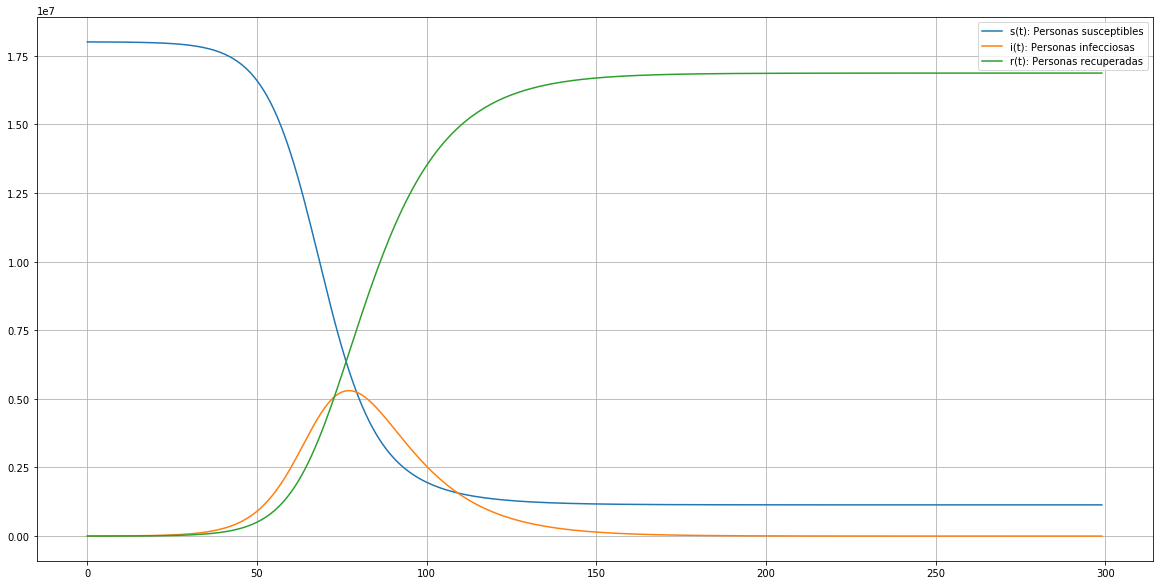

In [6]:
# Forward Euler Method para 1 valor de t, por tanto la iteracion se hace fuera del metodo.
def euler_ode(y,t,f,h, alpha, beta):
    return y+h*f(t,y, alpha, beta)

#nos permite resolver la edo bajo varios metodos de resolucion
def solve_edo_p2(h, f, y0, M, N, alpha, beta, solver='euler'):
    #generamos los diferentes valores de t y agregamos el valor final porque arange no considera el final del intervalo
    t_times = np.arange(0, M, h)
    #generamos una arreglo para guardar nuestras soluciones
    y_output = np.zeros([t_times.size,np.size(y0)])
    #guardamos la solucion inicial
    y_output[0,:] = y0
    for i in range(1,t_times.size):
        if solver=='euler':
            y_output[i,:]=euler_ode(y_output[i-1,:],t_times[i-1],f,h, alpha, beta)
            #y_output[i]=euler_ode(y_output[i-1],t_times[i-1],f,h)
        elif solver=='RK2':
            y_output[i]=RK2_ode(y_output[i-1],t_times[i-1],f,h)
        else:
            y_output[i]=RK4_ode(y_output[i-1],t_times[i-1],f,h)
    y1, y2, y3 = y_output[:,0], y_output[:,1], y_output[:,2]
    return t_times, y1, y2, y3

#definimos nuestra funcion vectorial que contiene y1', y2', y3'
def my_fun(t,y, alpha, beta):
    y1, y2, y3 = y[0], y[1], y[2]
    return np.array([-alpha*y1*y2, alpha*y1*y2 - beta*y2, beta*y2])

#datos del problema eligiendo
alpha=np.linspace(2/14, 4/14, 10)
alpha_=alpha[4]
beta_=1/14
M_=300
N_= 18000000
h_=1
#nuestros valores iniciales
y0 = [(N-1)/N, 1/N, 0]
#resolvemos nuestra ecuacion
sol = solve_edo_p2(h_, my_fun, y0, M_, N, alpha_, beta_, 'euler')
#escribimos nuestros resultados para validar
verbose = False
if verbose: print("tiempos",sol[0])
if verbose: print("y1",sol[1])
if verbose: print("y2",sol[2])
if verbose: print("y3",sol[3])

#graficamos los resultados
L=20
plt.figure(figsize=(L,L/2))
plt.plot(sol[0], sol[1]*N_,'-', label='s(t): Personas susceptibles')
plt.plot(sol[0], sol[2]*N_,'-', label='i(t): Personas infecciosas')
plt.plot(sol[0], sol[3]*N_,'-', label='r(t): Personas recuperadas')
plt.legend
plt.legend(loc='best')
plt.grid()
plt.show()

### 2.e

Para obtener el numero de personas infecciones, simplemente debemos obtener el maximo de los valores obtenidos en I(t), es decir el maximo de i(t)*N:

El maximo numero de infectados es 5299314.0


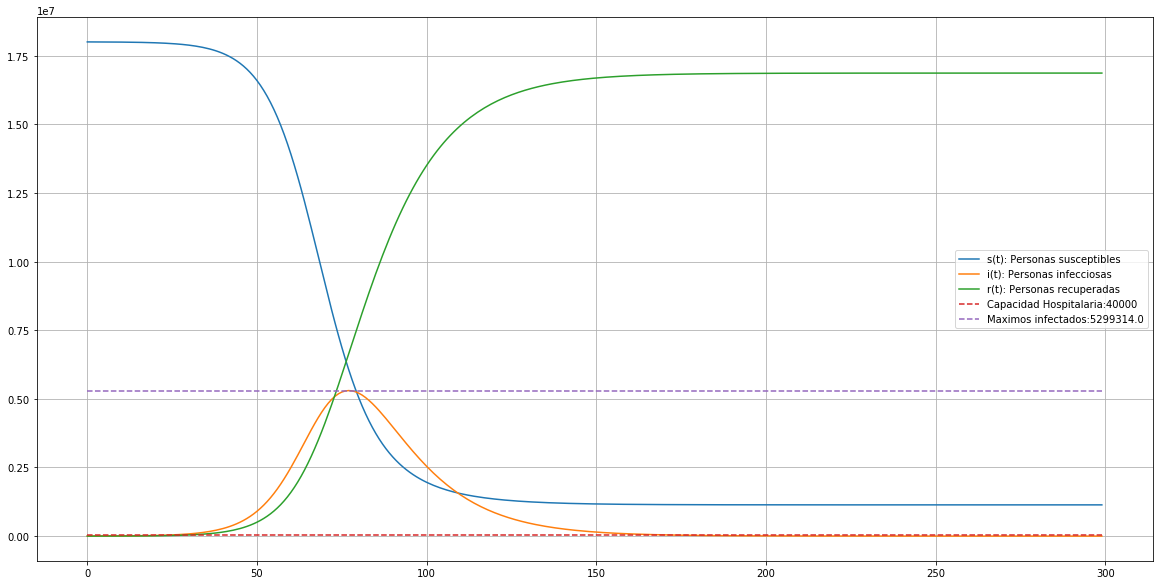

In [7]:
MaxInfec = np.ceil(np.amax(sol[2]*N_))
print('El maximo numero de infectados es {0}'.format(MaxInfec))

#graficamos los resultados
L=20
plt.figure(figsize=(L,L/2))
plt.plot(sol[0], sol[1]*N_,'-', label='s(t): Personas susceptibles')
plt.plot(sol[0], sol[2]*N_,'-', label='i(t): Personas infecciosas')
plt.plot(sol[0], sol[3]*N_,'-', label='r(t): Personas recuperadas')
plt.plot(sol[0], np.full(np.size(sol[2]), 40000),'--', label='Capacidad Hospitalaria:{0}'.format(40000))
plt.plot(sol[0], np.full(np.size(sol[2]), MaxInfec),'--', label='Maximos infectados:{0}'.format(MaxInfec))
plt.legend
plt.legend(loc='best')
plt.grid()
plt.show()

### 2.f

El maximo numero de infectados es 196097.0


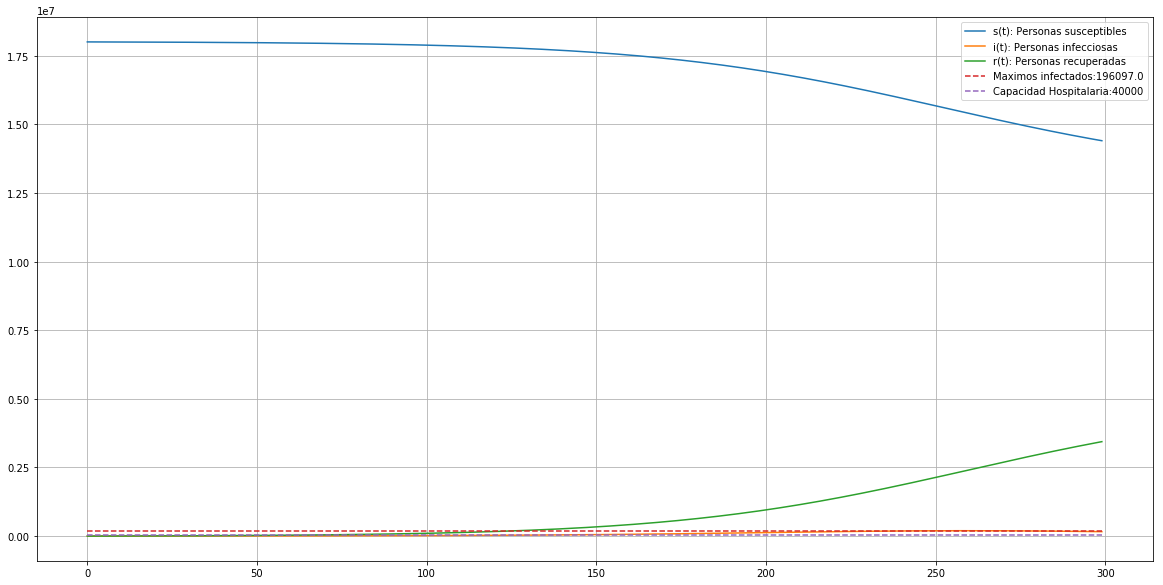

In [9]:
#datos del problema eligiendo
alpha_=1/6
beta_=1/7
M_=300
N_= 18000000
h_=1
#nuestros valores iniciales
y0 = [(N-1)/N, 1/N, 0]
#resolvemos nuestra ecuacion
sol = solve_edo_p2(h_, my_fun, y0, M_, N_, alpha_, beta_, 'euler')
#escribimos nuestros resultados para validar
verbose = False
if verbose: print("tiempos",sol[0])
if verbose: print("y1",sol[1])
if verbose: print("y2",sol[2])
if verbose: print("y3",sol[3])

#graficamos los resultados
MaxInfec = np.ceil(np.amax(sol[2]*N_))
print('El maximo numero de infectados es {0}'.format(MaxInfec))
L=20
plt.figure(figsize=(L,L/2))
plt.plot(sol[0], sol[1]*N_,'-', label='s(t): Personas susceptibles')
plt.plot(sol[0], sol[2]*N_,'-', label='i(t): Personas infecciosas')
plt.plot(sol[0], sol[3]*N_,'-', label='r(t): Personas recuperadas')
plt.plot(sol[0], np.full(np.size(sol[2]), MaxInfec),'--', label='Maximos infectados:{0}'.format(MaxInfec))
plt.plot(sol[0], np.full(np.size(sol[2]), 40000),'--', label='Capacidad Hospitalaria:{0}'.format(40000))
plt.legend
plt.legend(loc='best')
plt.grid()
plt.show()

El numero de contagiados en este caso es de 196097.0, no debería alcanzar la capacidad del sistema sanitario, por lo cual sirve bastante aplanar la curva. Evitaría el colapso del sistema.

## Pregunta 3

<img src="enun_pregunta3.png">

### 3.a

### 3.b

### 3.c

---
# Referencias
[1] Maximo elemento en array
https://thispointer.com/find-max-value-its-index-in-numpy-array-numpy-amax/